<h1>Анализ A/B теста по метрикам конверсии и среднего чека<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта-и-постановка-задач" data-toc-modified-id="Описание-проекта-и-постановка-задач-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание проекта и постановка задач</a></span></li><li><span><a href="#Импорт-библиотек" data-toc-modified-id="Импорт-библиотек-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Импорт библиотек</a></span></li><li><span><a href="#Загрузка-и-изучение-данных,-подготовка-их-к-анализу" data-toc-modified-id="Загрузка-и-изучение-данных,-подготовка-их-к-анализу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Загрузка и изучение данных, подготовка их к анализу</a></span><ul class="toc-item"><li><span><a href="#Датафрейм-orders" data-toc-modified-id="Датафрейм-orders-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Датафрейм <code>orders</code></a></span><ul class="toc-item"><li><span><a href="#Корректность-разбивки-пользователей-на-группы-теста" data-toc-modified-id="Корректность-разбивки-пользователей-на-группы-теста-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Корректность разбивки пользователей на группы теста</a></span></li><li><span><a href="#Баг-репорт-менеджеру-продукта:" data-toc-modified-id="Баг-репорт-менеджеру-продукта:-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Баг-репорт менеджеру продукта:</a></span></li><li><span><a href="#Выводы-по-изчению-датафрейма-orders-и-подготовке-данных-к-анализу" data-toc-modified-id="Выводы-по-изчению-датафрейма-orders-и-подготовке-данных-к-анализу-3.1.3"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>Выводы по изчению датафрейма <code>orders</code> и подготовке данных к анализу</a></span></li></ul></li><li><span><a href="#Датафрейм-visitors" data-toc-modified-id="Датафрейм-visitors-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Датафрейм <code>visitors</code></a></span><ul class="toc-item"><li><span><a href="#Выводы-по-изчению-датафрейма-visitors-и-подготовке-данных-к-анализу" data-toc-modified-id="Выводы-по-изчению-датафрейма-visitors-и-подготовке-данных-к-анализу-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Выводы по изчению датафрейма <code>visitors</code> и подготовке данных к анализу</a></span></li></ul></li><li><span><a href="#Подготовка-сводной-таблицы-data-по-дневным-и-кумулятивным-показателям-групп" data-toc-modified-id="Подготовка-сводной-таблицы-data-по-дневным-и-кумулятивным-показателям-групп-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Подготовка сводной таблицы <code>data</code> по дневным и кумулятивным показателям групп</a></span></li></ul></li><li><span><a href="#Анализ-кумулятивных-метрик-по-группам" data-toc-modified-id="Анализ-кумулятивных-метрик-по-группам-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Анализ кумулятивных метрик по группам</a></span><ul class="toc-item"><li><span><a href="#Выручка" data-toc-modified-id="Выручка-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Выручка</a></span></li><li><span><a href="#Конверсия" data-toc-modified-id="Конверсия-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Конверсия</a></span></li><li><span><a href="#Средний-чек" data-toc-modified-id="Средний-чек-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Средний чек</a></span></li></ul></li><li><span><a href="#Анализ-выбросов" data-toc-modified-id="Анализ-выбросов-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Анализ выбросов</a></span><ul class="toc-item"><li><span><a href="#Количество-заказов-на-покупателя" data-toc-modified-id="Количество-заказов-на-покупателя-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Количество заказов на покупателя</a></span></li><li><span><a href="#Стоимость-заказа" data-toc-modified-id="Стоимость-заказа-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Стоимость заказа</a></span></li></ul></li><li><span><a href="#Статзначимость-различий-по-&quot;сырым&quot;-данным" data-toc-modified-id="Статзначимость-различий-по-&quot;сырым&quot;-данным-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Статзначимость различий по "сырым" данным</a></span><ul class="toc-item"><li><span><a href="#Различия-в-конверсии" data-toc-modified-id="Различия-в-конверсии-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Различия в конверсии</a></span><ul class="toc-item"><li><span><a href="#Проверка-на-нормальность-распределения-конверсий" data-toc-modified-id="Проверка-на-нормальность-распределения-конверсий-6.1.1"><span class="toc-item-num">6.1.1&nbsp;&nbsp;</span>Проверка на нормальность распределения конверсий</a></span></li><li><span><a href="#Проверка-значимости-z-тестом" data-toc-modified-id="Проверка-значимости-z-тестом-6.1.2"><span class="toc-item-num">6.1.2&nbsp;&nbsp;</span>Проверка значимости z-тестом</a></span></li><li><span><a href="#Относительный-прирост-конверсии-группы-B-относительно-конверсии-группы-А" data-toc-modified-id="Относительный-прирост-конверсии-группы-B-относительно-конверсии-группы-А-6.1.3"><span class="toc-item-num">6.1.3&nbsp;&nbsp;</span>Относительный прирост конверсии группы B относительно конверсии группы А</a></span></li></ul></li><li><span><a href="#Различия-в-чеке" data-toc-modified-id="Различия-в-чеке-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Различия в чеке</a></span><ul class="toc-item"><li><span><a href="#Проверка-на-нормальность-распределения-чеков" data-toc-modified-id="Проверка-на-нормальность-распределения-чеков-6.2.1"><span class="toc-item-num">6.2.1&nbsp;&nbsp;</span>Проверка на нормальность распределения чеков</a></span></li><li><span><a href="#Проверка-значимости-тестом-Манна-Уитни" data-toc-modified-id="Проверка-значимости-тестом-Манна-Уитни-6.2.2"><span class="toc-item-num">6.2.2&nbsp;&nbsp;</span>Проверка значимости тестом Манна-Уитни</a></span></li><li><span><a href="#Относительный-прирост-среднего-чека-группы-B-относительно-среднего-чека-группы-А" data-toc-modified-id="Относительный-прирост-среднего-чека-группы-B-относительно-среднего-чека-группы-А-6.2.3"><span class="toc-item-num">6.2.3&nbsp;&nbsp;</span>Относительный прирост среднего чека группы B относительно среднего чека группы А</a></span></li></ul></li><li><span><a href="#Различия-в-среднедневном-чеке-(факультативно)" data-toc-modified-id="Различия-в-среднедневном-чеке-(факультативно)-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Различия в среднедневном чеке (<em>факультативно</em>)</a></span><ul class="toc-item"><li><span><a href="#Проверка-на-нормальность-распределения-среднедневных-чеков" data-toc-modified-id="Проверка-на-нормальность-распределения-среднедневных-чеков-6.3.1"><span class="toc-item-num">6.3.1&nbsp;&nbsp;</span>Проверка на нормальность распределения среднедневных чеков</a></span></li><li><span><a href="#Проверка-значимости-тестом-Манна-Уитни" data-toc-modified-id="Проверка-значимости-тестом-Манна-Уитни-6.3.2"><span class="toc-item-num">6.3.2&nbsp;&nbsp;</span>Проверка значимости тестом Манна-Уитни</a></span></li><li><span><a href="#Относительный-прирост-среднего-среднедневного-чека-группы-B-относительно-среднего-среднедневного-чека-группы-А" data-toc-modified-id="Относительный-прирост-среднего-среднедневного-чека-группы-B-относительно-среднего-среднедневного-чека-группы-А-6.3.3"><span class="toc-item-num">6.3.3&nbsp;&nbsp;</span>Относительный прирост среднего среднедневного чека группы B относительно среднего среднедневного чека группы А</a></span></li></ul></li></ul></li><li><span><a href="#Стат.значимость-различий-по-&quot;очищенным&quot;-данным" data-toc-modified-id="Стат.значимость-различий-по-&quot;очищенным&quot;-данным-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Стат.значимость различий по "очищенным" данным</a></span><ul class="toc-item"><li><span><a href="#Удаление-выбросов:-data_cut" data-toc-modified-id="Удаление-выбросов:-data_cut-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Удаление выбросов: <code>data_cut</code></a></span></li><li><span><a href="#Различия-в-конверсии:-проверка-значимости-z-тестом" data-toc-modified-id="Различия-в-конверсии:-проверка-значимости-z-тестом-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Различия в конверсии: проверка значимости z-тестом</a></span></li><li><span><a href="#Различия-в-чеке" data-toc-modified-id="Различия-в-чеке-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Различия в чеке</a></span><ul class="toc-item"><li><span><a href="#Проверка-на-нормальность-распределения-чеков" data-toc-modified-id="Проверка-на-нормальность-распределения-чеков-7.3.1"><span class="toc-item-num">7.3.1&nbsp;&nbsp;</span>Проверка на нормальность распределения чеков</a></span></li><li><span><a href="#Проверка-значимости-тестом-Манна-Уитни" data-toc-modified-id="Проверка-значимости-тестом-Манна-Уитни-7.3.2"><span class="toc-item-num">7.3.2&nbsp;&nbsp;</span>Проверка значимости тестом Манна-Уитни</a></span></li><li><span><a href="#Относительный-прирост-среднего-чека-группы-B-относительно-среднего-чека-группы-А" data-toc-modified-id="Относительный-прирост-среднего-чека-группы-B-относительно-среднего-чека-группы-А-7.3.3"><span class="toc-item-num">7.3.3&nbsp;&nbsp;</span>Относительный прирост среднего чека группы B относительно среднего чека группы А</a></span></li></ul></li><li><span><a href="#Различия-в-среднедневном-чеке-(факультативно)" data-toc-modified-id="Различия-в-среднедневном-чеке-(факультативно)-7.4"><span class="toc-item-num">7.4&nbsp;&nbsp;</span>Различия в среднедневном чеке (<em>факультативно</em>)</a></span><ul class="toc-item"><li><span><a href="#Проверка-на-нормальность-распределения-среднедневных-чеков" data-toc-modified-id="Проверка-на-нормальность-распределения-среднедневных-чеков-7.4.1"><span class="toc-item-num">7.4.1&nbsp;&nbsp;</span>Проверка на нормальность распределения среднедневных чеков</a></span></li><li><span><a href="#Проверка-значимости-t-тестом" data-toc-modified-id="Проверка-значимости-t-тестом-7.4.2"><span class="toc-item-num">7.4.2&nbsp;&nbsp;</span>Проверка значимости t-тестом</a></span></li><li><span><a href="#Относительный-прирост-среднего-от-среднедневного-чека-группы-B-относительно-среднего-от-среднедневного-чека-группы-А" data-toc-modified-id="Относительный-прирост-среднего-от-среднедневного-чека-группы-B-относительно-среднего-от-среднедневного-чека-группы-А-7.4.3"><span class="toc-item-num">7.4.3&nbsp;&nbsp;</span>Относительный прирост среднего от среднедневного чека группы B относительно среднего от среднедневного чека группы А</a></span></li></ul></li><li><span><a href="#Выводы-по-анализу-А/В-теста" data-toc-modified-id="Выводы-по-анализу-А/В-теста-7.5"><span class="toc-item-num">7.5&nbsp;&nbsp;</span>Выводы по анализу А/В теста</a></span></li></ul></li></ul></div>

## Описание проекта и постановка задач

В крупном интернет-магазине проведен A/B-тест и получены результаты, которые описаны в датафреймах `orders` и `visitors`. 

Задача: проанализировать результаты теста, объяснить его и принять одно из решений: 
1. Остановить тест, зафиксировать победу одной из групп. 
2. Остановить тест, зафиксировать отсутствие различий между группами. 
3. Продолжить тест.

## Импорт библиотек

In [1]:
import pandas as pd

import numpy as np

import math as mth

from scipy import stats as st
from statsmodels.stats.proportion import proportions_ztest

import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

from datetime import date, time, timedelta

import warnings
warnings.filterwarnings("ignore")

pd.options.display.max_columns = 100

## Загрузка и изучение данных, подготовка их к анализу

### Датафрейм `orders`

In [2]:
orders = pd.read_csv('orders.csv')
orders.sample()

,transactionId,visitorId,date,revenue,group
103,2951399376,2019355024,2019-08-01,2550,B


Рассмотрим датафрейм `orders` со столбцами:
* transactionId — идентификатор заказа;
* visitorId — идентификатор пользователя, совершившего заказ;
* date — дата, когда был совершён заказ;
* revenue — выручка заказа;
* group — группа A/B-теста, в которую попал заказ.

In [3]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


Придерживаемся правил хорошего пиТона  - поменяем camelCase на snake_case. Приведем колонку `date` к формату `datetime`.

In [4]:
orders.set_axis(['transaction_id', 'visitor_id', 'date', 'revenue', 'group'], axis = 'columns', inplace = True)
orders['date'] = pd.to_datetime(orders['date'])
orders.sample(5)

,transaction_id,visitor_id,date,revenue,group
263,2575861846,4256040402,2019-08-18,10970,B
647,2180201337,1728743776,2019-08-26,9490,B
833,1636454846,4237561104,2019-08-30,590,A
383,3533599275,4018812886,2019-08-03,1490,B
77,2619374735,787824685,2019-08-16,32350,A


In [5]:
orders['date'].min()

Timestamp('2019-08-01 00:00:00')

In [6]:
orders['date'].max()

Timestamp('2019-08-31 00:00:00')

Проверим дубликаты в номерах транзакций.

In [7]:
orders['transaction_id'].agg(['nunique', 'count'])

nunique    1197
count      1197
Name: transaction_id, dtype: int64

Дубликаты в номерах транзакций не обнаружены.

####  Корректность разбивки пользователей на группы теста

Число уникальных пользователей в датафрейме `orders`:

In [8]:
orders['visitor_id'].nunique()

1031

Не совпадает с длиной датафрейма, пользователи могли делать несколько транзакций. Сколько уникальных пользователей в каждой группе и сколько всего записей в каждой группе:

In [9]:
records_by_groups = orders.groupby(['group'], as_index=False)[['visitor_id']].agg(['nunique','count']).reset_index()
records_by_groups.columns = records_by_groups.columns.droplevel(level=1)
records_by_groups.set_axis(['group', 'visitor_id_nunique', 'orders'], axis = 'columns', inplace = True)
records_by_groups.set_index('group')
records_by_groups

,group,visitor_id_nunique,orders
0,A,503,557
1,B,586,640


Складываем число уникальных пользователей из группы А и группы В:

In [10]:
records_by_groups['visitor_id_nunique'].sum()

1089

Сумма уникальных пользователей из каждой группы превышает число уникальных пользователей в датафрейме.

Встречаются ли пользователи, которые попали и в А, и в В группу:

In [11]:
two_groups = orders.groupby(['visitor_id']).agg({'group':'nunique'}).reset_index()
two_groups.set_axis(['visitor_id', 'count_groups'], axis = 'columns', inplace = True)
two_groups = two_groups[two_groups['count_groups'] !=1]
two_groups.sample(3)

,visitor_id,count_groups
958,3963646447,2
792,3234906277,2
1023,4256040402,2


In [12]:
print('В датафрейме `orders` пользователей, которые попали одновременно и в группу А, и в группу В:', len(two_groups))

В датафрейме `orders` пользователей, которые попали одновременно и в группу А, и в группу В: 58


Проверяем, считаем разность между числом уникальных пользователей в группах (сумма уников из двух групп) и числом уникальных пользователей в датафрейме без учета деления группы:

In [13]:
records_by_groups['visitor_id_nunique'].sum() - orders['visitor_id'].nunique()

58

Сходится. Какую долю занимают такие неоднозначные пользователи:

In [14]:
print('Доля пользователей, попавших одновременно в группу А и в группу В:', len(two_groups) / orders['visitor_id'].nunique() )

Доля пользователей, попавших одновременно в группу А и в группу В: 0.05625606207565471


Можно ли с ними что-то сделать? Отрежем транзакции с пользователями, попавшими одновременно в разные группы, в отдельный датафрейм `transactions_to_help`:

In [15]:
transactions_to_help = orders.query('visitor_id in @two_groups.visitor_id')
print('Число транзакций с пользователями, попавшими одновременно в разные группы:', len(transactions_to_help))
print('Доля транзакций с пользователями, попавшими одновременно в разные группы:', len(transactions_to_help) /len(orders))

Число транзакций с пользователями, попавшими одновременно в разные группы: 181
Доля транзакций с пользователями, попавшими одновременно в разные группы: 0.15121136173767752


Доля транзакций с пользователями, попавшими одновременно в разные группы, огромно = 15% от всех имеющихся транзакций.

In [16]:
transactions_to_help.sample(3)

,transaction_id,visitor_id,date,revenue,group
517,582361359,2044997962,2019-08-26,990,B
783,189332332,1959144690,2019-08-27,16480,B
480,1954636284,2600415354,2019-08-06,1530,B


Пробуем выделить самую раннюю дату среди транзакций каждого пользователя, чтобы по ней установить группу:

In [17]:
first_date = transactions_to_help.groupby(['visitor_id']).agg({'date':'min'}).reset_index()
first_date.columns = ['visitor_id', 'first_date']
first_date.head(3)

,visitor_id,first_date
0,8300375,2019-08-01
1,199603092,2019-08-02
2,232979603,2019-08-31


In [18]:
transactions_to_help = transactions_to_help.merge(first_date, on = 'visitor_id')
transactions_to_help.head()

,transaction_id,visitor_id,date,revenue,group,first_date
0,2961555356,4069496402,2019-08-15,400,A,2019-08-12
1,1473132782,4069496402,2019-08-12,640,B,2019-08-12
2,2904772834,963407295,2019-08-15,300,B,2019-08-14
3,1458356232,963407295,2019-08-14,4940,A,2019-08-14
4,4252514150,351125977,2019-08-15,15185,B,2019-08-06


Оставляем только строки, где дата транзакции такая же как дата первой транзакции для каждого пользователя:

In [19]:
transactions_to_help_first = transactions_to_help.query('date == first_date')
transactions_to_help_first

,transaction_id,visitor_id,date,revenue,group,first_date
1,1473132782,4069496402,2019-08-12,640,B,2019-08-12
3,1458356232,963407295,2019-08-14,4940,A,2019-08-14
5,3075639014,351125977,2019-08-06,4485,A,2019-08-06
6,1162046357,3234906277,2019-08-15,7555,B,2019-08-15
10,437656952,199603092,2019-08-02,3488,B,2019-08-02
...,...,...,...,...,...,...
175,3620682463,2654030115,2019-08-13,1980,B,2019-08-13
177,1277417350,3963646447,2019-08-14,6385,A,2019-08-14
178,2289555915,3963646447,2019-08-14,7485,B,2019-08-14
179,4052155355,2949041841,2019-08-14,190,A,2019-08-14


Но строк получается не 58 как этих пользователей, а 78! То есть некоторые пользователи делали покупку на сайте в один и тот же день, попадая при каждой транзакции в разные группы!

#### Баг-репорт менеджеру продукта: 

"В датафрейме по результатам A/B теста `orders` имеется 58 пользователей с одинаковым `visitorId`, которые попали одновременно и в группу А, и в группу В. 58 пользователей - это 5.63% от общего числа уникальных пользователей. Число транзакций с пользователями, попавшими одновременно в разные группы: 181 - это 15.12% от общего числа транзакций в датафрейме `orders`. Некоторые пользователи совершали разные транзакции в одну и ту же дату и попали в разные группы. Пожалуйста, останавливайте тест и проверяйте ошибки разделения на группы".

По-хорошему, анализировать такие результаты не имеет смысла - сплит на А/В сделан с ошибками. И нужно прямо здесь выбрать четвертый вариант решения: закрываем тест, чиним баги, запускаем новый.

Если отрезать транзакции неоднозначных пользователей (15% датафрейма!):

In [20]:
orders_new = orders.query('visitor_id not in @two_groups.visitor_id')
records_new_by_groups = orders_new.groupby(['group'], as_index=False)[['visitor_id']].agg(['nunique','count']).reset_index()
records_new_by_groups.columns = records_new_by_groups.columns.droplevel(level=1)
records_new_by_groups.set_axis(['group', 'visitor_id_nunique', 'visitor_id_count'], axis = 'columns', inplace = True)
records_new_by_groups.set_index('group')
records_new_by_groups

,group,visitor_id_nunique,visitor_id_count
0,A,445,468
1,B,528,548


#### Выводы по изчению датафрейма `orders` и подготовке данных к анализу

В датафрейме `orders` собраны данные о 1197 заказах пользователей за 31 день с 1 по 31 августа 2019 года, пропусков не обнаружено, каждый заказ имеет индивидуальный идентификатор `transaction_id` (дубликатов нет), пользователи различаются по `visitor_id` (всего 1031 уникальный пользователь), в датафрейме могут быть несколько заказов от одного пользователя. По каждому заказа указана выручка за заказ. 

Пользователи разделены на группы А и В для А/В теста. При этом разделение на группы произведено с ошибкой и 58 пользователей из 1031 (5.63%) попали одновременно в группу А и группу Б - и в датафрейме `orders` 181 транзакция(15.12% от числа всех транзакций!) сделана такими пользователями, при этом не менее 20 заказов сделаны попавшими в разные группы пользователями в один и тот же день, что не позволяет "починить им группу" по группе, присвоенной в самую раннюю дату. По ошибкам сплитования подготовлен баг-репорт разработчикам и менеджеру продукта/проекта. В датафрейме `orders` в группе А числятся 503 пользователя, в группе B - 586 пользователей.

Полагаем, что анализировать такие результаты мало смысла изначально - нужно выбрать закрыть тест, починить механизм разделения на группы и запустить новый.

Продолжаем анализ с методически-ученической целью. Отсекаем неоднозначных пользователей и создаем датафрейм `orders_new`, в котором только транзакции от пользователей, однозначно записанных в одну из групп. В группе А остается 445 пользователей - они сделали 468 заказов, в группе B - 528 пользователей, которые сделали 548 заказов. Пользователи разделены на группы неравномерно.

### Датафрейм `visitors`

In [21]:
visitors = pd.read_csv('visitors.csv')
visitors.sample(5)

,date,group,visitors
29,2019-08-30,A,490
61,2019-08-31,B,718
54,2019-08-24,B,378
38,2019-08-08,B,654
44,2019-08-14,B,746


Рассмотрим датафрейм `visitors` со столбцами:
* date — дата;
* group — группа A/B-теста;
* visitors — количество пользователей в указанную дату в указанной группе A/B-теста.

In [22]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


Приведем колонку date к формату datetime.

In [23]:
visitors['date'] = pd.to_datetime(visitors['date'])

Разделим посетителей на два датасета по группам:

In [24]:
visitors_a = visitors.query('group == "A"')[['date', 'visitors']]
visitors_b = visitors.query('group == "B"')[['date', 'visitors']]

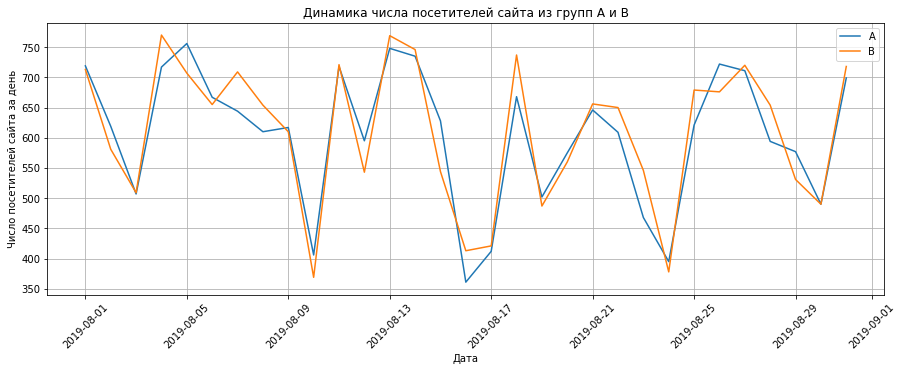

In [25]:
plt.figure(figsize = (15, 5))
plt.plot(visitors_a['date'], visitors_a['visitors'], label='A')
plt.plot(visitors_b['date'], visitors_b['visitors'], label='B')
plt.xlabel('Дата')
plt.xticks(rotation=45)
plt.ylabel('Число посетителей сайта за день')
plt.title('Динамика числа посетителей сайта из групп А и В')
plt.grid(True)
plt.legend()
plt.show()

In [26]:
visitors['date'].min()

Timestamp('2019-08-01 00:00:00')

In [27]:
visitors['date'].max()

Timestamp('2019-08-31 00:00:00')

In [28]:
visitors['date'].nunique()

31

#### Выводы по изчению датафрейма `visitors` и подготовке данных к анализу

В датафрейме `visitors` представлено число пользователей в указанную дату за период 31 день с 01.08.19 по 31.08.19 в группе А и в группе В по результатам A/B-теста (62 строки), пропусков не обнаружено. По обеим группам наблюдаются еженедельные проседания численности посетителей (похоже, с пятницы на субботу), иногда в два раза.

Использовать `orders_new` нет смысла, потому что нет возможности отсечь неоднозначных пользователей из `visitors`.

### Подготовка сводной таблицы `data` по дневным и кумулятивным показателям групп

In [29]:
visitors_a.columns = ['date', 'visitors_a']
visitors_b.columns = ['date', 'visitors_b']

Считаем число посетителей по группам А и В накопительным итогом:

In [30]:
visitors_a_cumsum = visitors_a.apply(
    lambda x: visitors_a[visitors_a['date'] <= x['date']].agg(
    {'date': 'max', 'visitors_a': 'sum'}
    ),
    axis=1,)
visitors_a_cumsum.columns = ['date', 'visitors_a_cumsum']
visitors_a_cumsum.head()

,date,visitors_a_cumsum
0,2019-08-01,719
1,2019-08-02,1338
2,2019-08-03,1845
3,2019-08-04,2562
4,2019-08-05,3318


In [31]:
visitors_b_cumsum = visitors_b.apply(
    lambda x: visitors_b[visitors_b['date'] <= x['date']].agg(
    {'date': 'max', 'visitors_b': 'sum'}
    ),
    axis=1,)
visitors_b_cumsum.columns = ['date', 'visitors_b_cumsum']

Формируем две таблицы заказов по посетителям из группы А и из группы В, посчитав число транзакций за день и сумму заказов за день:

In [32]:
orders_a_daily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
orders_a_daily.columns = ['date', 'orders_a_per_date', 'revenue_a_per_date']
orders_a_daily.head()

,date,orders_a_per_date,revenue_a_per_date
0,2019-08-01,24,148579
1,2019-08-02,20,93822
2,2019-08-03,24,112473
3,2019-08-04,16,70825
4,2019-08-05,25,124218


In [33]:
orders_b_daily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
orders_b_daily.columns = ['date', 'orders_b_per_date', 'revenue_b_per_date']
orders_b_daily.head()

,date,orders_b_per_date,revenue_b_per_date
0,2019-08-01,21,101217
1,2019-08-02,24,165531
2,2019-08-03,16,114248
3,2019-08-04,17,108571
4,2019-08-05,23,92428


In [34]:
orders_a_cumsum = orders_a_daily.apply(
    lambda x: orders_a_daily[orders_a_daily['date'] <= x['date']].agg(
        {'date': 'max', 'orders_a_per_date': 'sum', 'revenue_a_per_date': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
orders_a_cumsum.columns = [
    'date',
    'orders_a_cumsum',
    'revenue_a_cumsum',
]
orders_a_cumsum.head()

,date,orders_a_cumsum,revenue_a_cumsum
0,2019-08-01,24,148579
1,2019-08-02,44,242401
2,2019-08-03,68,354874
3,2019-08-04,84,425699
4,2019-08-05,109,549917


In [35]:
orders_b_cumsum = orders_b_daily.apply(
    lambda x: orders_b_daily[orders_b_daily['date'] <= x['date']].agg(
        {'date': 'max', 'orders_b_per_date': 'sum', 'revenue_b_per_date': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
orders_b_cumsum.columns = [
    'date',
    'orders_b_cumsum',
    'revenue_b_cumsum',
]
orders_b_cumsum.head()

,date,orders_b_cumsum,revenue_b_cumsum
0,2019-08-01,21,101217
1,2019-08-02,45,266748
2,2019-08-03,61,380996
3,2019-08-04,78,489567
4,2019-08-05,101,581995


Склеиваем все сформированные в этом разделе таблички в единую сводную таблицу `data`:

In [36]:
data = (
    orders_a_daily
    .merge(orders_b_daily, left_on='date', right_on='date', how='left')
    .merge(orders_a_cumsum, left_on='date', right_on='date', how='left')
    .merge(orders_b_cumsum, left_on='date', right_on='date', how='left')
    .merge(visitors_a, left_on='date', right_on='date', how='left')
    .merge(visitors_b, left_on='date', right_on='date', how='left')
    .merge(visitors_a_cumsum, left_on='date', right_on='date', how='left')
    .merge(visitors_b_cumsum, left_on='date', right_on='date', how='left')
)
data.head(5)

,date,orders_a_per_date,revenue_a_per_date,orders_b_per_date,revenue_b_per_date,orders_a_cumsum,revenue_a_cumsum,orders_b_cumsum,revenue_b_cumsum,visitors_a,visitors_b,visitors_a_cumsum,visitors_b_cumsum
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


## Анализ кумулятивных метрик по группам

### Выручка

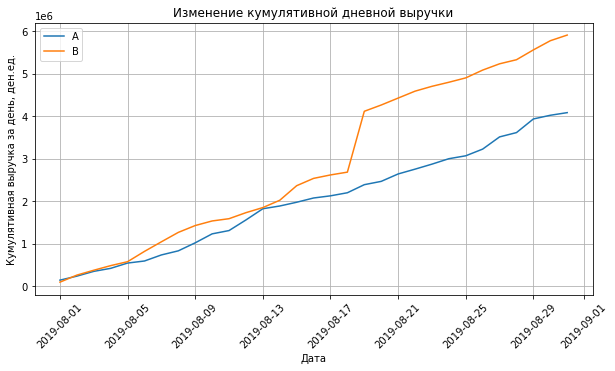

In [37]:
plt.figure(figsize = (10, 5))
plt.plot(data['date'], data['revenue_a_cumsum'], label='A')
plt.plot(data['date'], data['revenue_b_cumsum'], label='B')
plt.xlabel('Дата')
plt.xticks(rotation=45)
plt.grid(True)
plt.ylabel('Кумулятивная выручка за день, ден.ед.')
plt.title('Изменение кумулятивной дневной выручки')
plt.legend()
plt.show()

Кумулятивная выручка группы А почти равномерно увеличивается в течение всего теста. Кумулятивная выручка группы В увеличивается значительнее А, начиная с 09.08.19, а после 18 августа делает скачок более чем на 35% вверх и далее продолжает расти параллельно кумулятивной выручке группы А, но уже на уровне, превышающем А более, чем на треть.

Это может сигнализировать о резком скачке числа заказов в группе В,  о появлении в группе В очень дорогих заказов, либо о том и другом одновременно. Также не забываем, что численность группы В (586) превышает численность группы А (503), и есть еще 58 неоднозначных пользователей.

### Конверсия

In [38]:
data['conv_a_cumsum'] = data['orders_a_cumsum']/data['visitors_a_cumsum']
data['conv_b_cumsum'] = data['orders_b_cumsum']/data['visitors_b_cumsum']

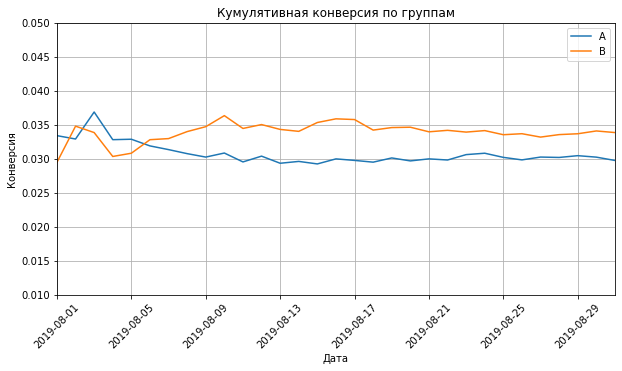

In [39]:
plt.figure(figsize = (10, 5))
plt.plot(data['date'], data['conv_a_cumsum'], label='A')
plt.plot(data['date'], data['conv_b_cumsum'], label='B')
plt.axis(["2019-08-01", '2019-08-31', 0.01, 0.05])
plt.xlabel('Дата')
plt.xticks(rotation=45)
plt.ylabel('Конверсия')
plt.title('Кумулятивная конверсия по группам')
plt.grid(True)
plt.legend()
plt.show()

В начале месяца кумулятивные конверсии групп колебались практические параллельно - группа А доминировала, но после 6 августа конверсия группы В вырвалась вверх, далее колебалась, но всегда до конца месяца превосходила конверсию группы А, а конверсия группы А просела и после 13 августа зафиксировалась. Конверсия группы В немного припала после 21 августа и стала более стабильной.

Относительное изменение конверсии (B/A):

Text(0.5, 1.0, 'Относительный прирост конверсии группы B относительно группы A')

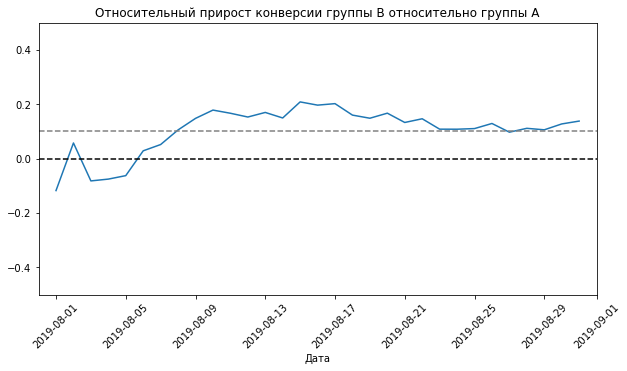

In [40]:
plt.figure(figsize = (10, 5))
plt.plot(data['date'], (data['conv_b_cumsum']/data['conv_a_cumsum']-1))
plt.xlabel('Дата')
plt.xticks(rotation=45)
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')
plt.axis(["2019-07-31", '2019-09-01', -0.5, 0.5])
plt.title('Относительный прирост конверсии группы B относительно группы A')

Относительный прирост конверсии группы В относительно группы А стабилизировался после 22 августа на уровне примерно 0.1.

### Средний чек

Посчитаем кумулятивный средний чек по группам — разделим кумулятивную выручку на кумулятивное число заказов.

In [41]:
data['avgbill_a_cumsum'] = data['revenue_a_cumsum'] / data['orders_a_cumsum']
data['avgbill_b_cumsum'] = data['revenue_b_cumsum'] / data['orders_b_cumsum']

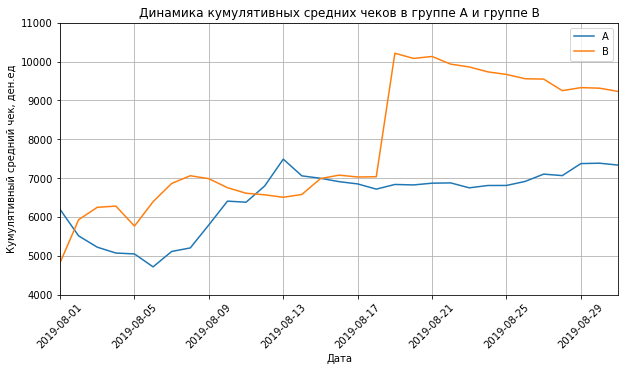

In [42]:
plt.figure(figsize = (10, 5))
plt.plot(data['date'], data['avgbill_a_cumsum'], label='A')
plt.plot(data['date'], data['avgbill_b_cumsum'], label='B')
plt.axis(["2019-08-01", '2019-08-31', 4000, 11000])
plt.xlabel('Дата')
plt.xticks(rotation=45)
plt.ylabel('Кумулятивный средний чек, ден.ед')
plt.title('Динамика кумулятивных средних чеков в группе А и группе В')
plt.grid(True)
plt.legend()
plt.show()

Относительное изменение среднего чека (B / A):

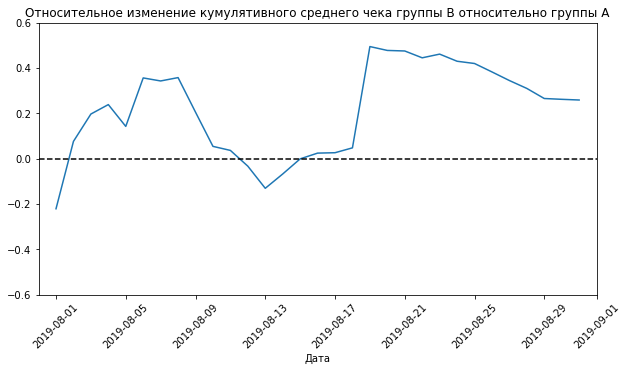

In [43]:
plt.figure(figsize = (10, 5))
plt.plot(data['date'], (data['avgbill_b_cumsum']/ data['avgbill_a_cumsum'] - 1))
plt.axis(["2019-07-31", '2019-09-01', -0.3, 0.6])
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Дата')
plt.xticks(rotation=45)
plt.axis(["2019-07-31", '2019-09-01', -0.6, 0.6])
plt.title('Относительное изменение кумулятивного среднего чека группы B относительно группы A')
plt.show()

Динамика кумулятивных средних чеков в группах А и В свидетельствует о том, что средний чек в группе В превосходил средний чек в группе А более, чем на треть, в большей части месяца, и после 18 августа  в группе В был сильнейший скачок в стоимости заказов. В группе А средний чек более менее стабилизировался во второй половине месяца, в группе В средний чек продолжает серьезные флуктуации, нужно больше времени, чтобы увидеть его стабилизацию. Из-за "дикого" поведения среднего чека в группе В, относительный показатель также переживает волатильность на протяжении всего рассматриваемого месяца.

## Анализ выбросов

### Количество заказов на покупателя

Группируем табличку с числом заказов на каждого уникального покупателя.

In [44]:
orders_per_buyer = orders.groupby(['visitor_id']).agg({'transaction_id': 'count'}).reset_index()
orders_per_buyer.columns = ['visitor_id', 'orders_per_buyer']
orders_per_buyer.sample(3)

,visitor_id,orders_per_buyer
830,3367493247,1
691,2853587382,1
889,3663170795,1


In [45]:
orders_per_buyer_len = pd.Series(range(0,len(orders_per_buyer['visitor_id'])))

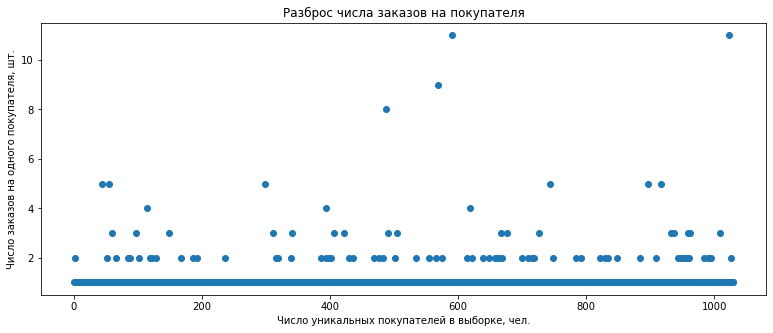

In [46]:
plt.figure(figsize = (13, 5))
plt.scatter(orders_per_buyer_len, orders_per_buyer['orders_per_buyer']) 
plt.title('Разброс числа заказов на покупателя')
plt.xlabel('Число уникальных покупателей в выборке, чел.')
plt.ylabel('Число заказов на одного покупателя, шт.')
plt.show()

Большинство покупателей сделали по одному заказу, есть толстая прослойка тех, кто сделал по два заказа, но также есть и такие, кто делал три, четыре, пять, и, даже, 11 заказов. Посмотрим, по сколько заказов сделали 90% людей из выборки, а также 95%, 98% и 99%.

Определим 90-й, 95-й, 98-й и 99-й перцентили числа заказов на покупателя:

In [47]:
print(np.percentile(orders_per_buyer['orders_per_buyer'], [90, 95, 98, 99])) 

[1. 2. 3. 4.]


Не более 5% уникальных пользователей сделали покупку за рассматриваемый период более 2 раз, не более 2% - более 3 раз, не более 1% - более 4 раз.

Для лучшей наглядности для принятия решения, какую границу в числе заказов принять за выброс, посмотрим "покрупнее" графики распределения покупателей, сделавших не более 4 заказов и не более 3 заказов:

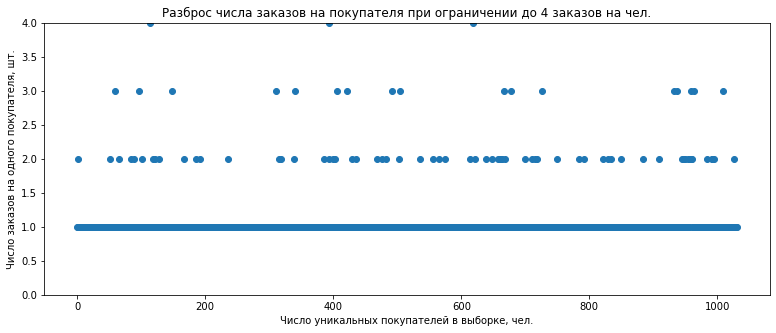

In [48]:
plt.figure(figsize = (13, 5))
plt.scatter(orders_per_buyer_len, orders_per_buyer['orders_per_buyer']) 
plt.title('Разброс числа заказов на покупателя при ограничении до 4 заказов на чел.')
plt.xlabel('Число уникальных покупателей в выборке, чел.')
plt.ylabel('Число заказов на одного покупателя, шт.')
plt.ylim (0, 4)
plt.show()

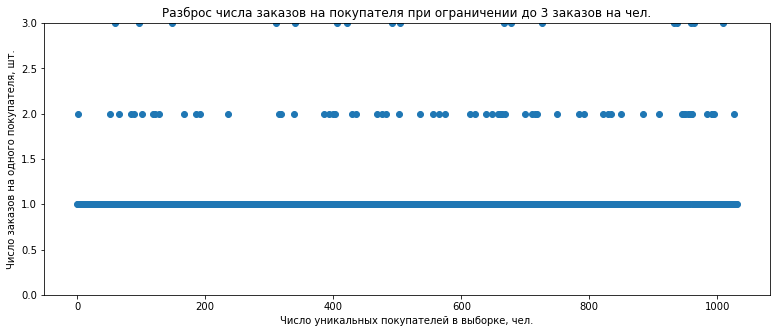

In [49]:
plt.figure(figsize = (13, 5))
plt.scatter(orders_per_buyer_len, orders_per_buyer['orders_per_buyer']) 
plt.title('Разброс числа заказов на покупателя при ограничении до 3 заказов на чел.')
plt.xlabel('Число уникальных покупателей в выборке, чел.')
plt.ylabel('Число заказов на одного покупателя, шт.')
plt.ylim (0, 3)
plt.show()

Датафрейм `orders` не так, чтобы очень большой, полагаю правильным предъявлять жесткие требования к сохранности данных, но 4 заказа - совсем уж редки, выбираю 98% персентиль. Аномальных покупателей определяю как покупателей, которые заказали > 3 раз за рассматриваемый период.

### Стоимость заказа

Также рассматриваем разброс в стоимости заказов.

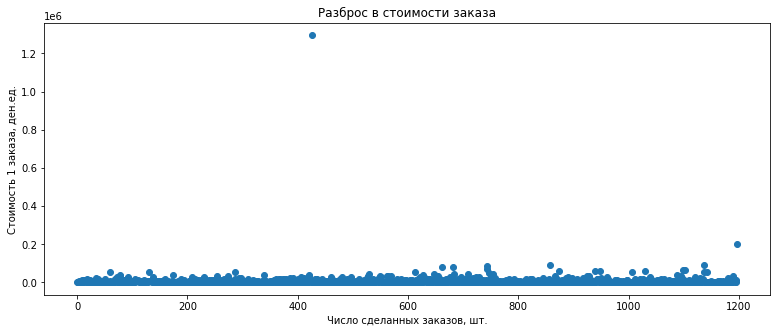

In [50]:
orders_len = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize = (13, 5))
plt.scatter(orders_len, orders['revenue']) 
plt.title('Разброс в стоимости заказа')
plt.xlabel('Число сделанных заказов, шт.')
plt.ylabel('Стоимость 1 заказа, ден.ед.')
plt.show()

Из-за выбросов более 1200000 ден.ед. график большинства слишком мелкий, можно сказать только, что, в основном, не более 100000 ден.ед. за заказ.

Определим 90-й, 95-й, 98-й и 99-й перцентили стоимости заказа:

In [51]:
print(np.percentile(orders['revenue'], [90, 95, 98, 99]))

[18168.  28000.  44133.2 58233.2]


Не более 5% заказов стоили более 28 тыс. ден.ед. Не более 2% заказов стоили больше 44133.2 ден.ед. Не более 1% заказов стоили более 58233.2 ден.ед., и случались даже заказы стоимостью более 1.2 млн. 

Посмотрим покрупнее графики распределения заказов стоимостью до 58 тыс.ден.ед./заказ и до 44 тыс.ден.ед./заказ:

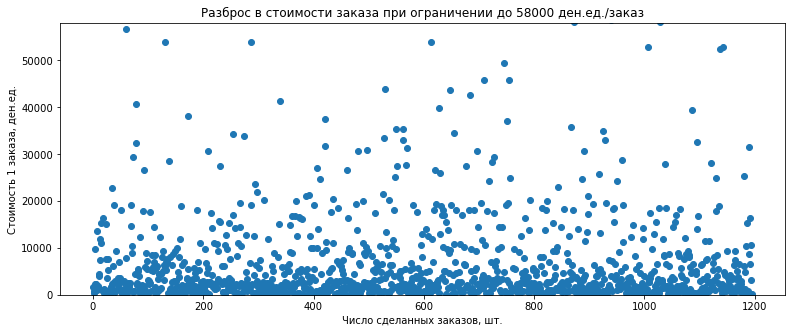

In [52]:
orders_len = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize = (13, 5))
plt.scatter(orders_len, orders['revenue']) 
plt.title('Разброс в стоимости заказа при ограничении до 58000 ден.ед./заказ')
plt.xlabel('Число сделанных заказов, шт.')
plt.ylabel('Стоимость 1 заказа, ден.ед.')
plt.ylim (0, 58000)
plt.show()

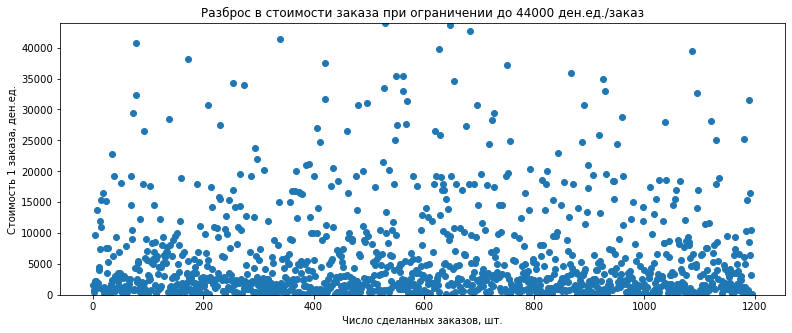

In [53]:
orders_len = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize = (13, 5))
plt.scatter(orders_len, orders['revenue']) 
plt.title('Разброс в стоимости заказа при ограничении до 44000 ден.ед./заказ')
plt.xlabel('Число сделанных заказов, шт.')
plt.ylabel('Стоимость 1 заказа, ден.ед.')
plt.ylim (0, 44000)
plt.show()

Число заказов дороже 40 тыс. наглядно "редеет". Выбираю 98% персентиль, буду считать аномальными заказы дороже 44 тыс. ден.ед.

## Статзначимость различий по "сырым" данным

### Различия в конверсии

In [54]:
data['conv_a'] = data['orders_a_per_date'] / data['visitors_a']
data['conv_b'] = data['orders_b_per_date'] / data['visitors_b']
data.sample()

,date,orders_a_per_date,revenue_a_per_date,orders_b_per_date,revenue_b_per_date,orders_a_cumsum,revenue_a_cumsum,orders_b_cumsum,revenue_b_cumsum,visitors_a,visitors_b,visitors_a_cumsum,visitors_b_cumsum,conv_a_cumsum,conv_b_cumsum,avgbill_a_cumsum,avgbill_b_cumsum,conv_a,conv_b
17,2019-08-18,17,72398,9,65831,328,2202167,382,2686621,668,737,11127,11171,0.029478,0.034196,6713.92378,7033.039267,0.025449,0.012212


#### Проверка на нормальность распределения конверсий

Нормальность распределения конверсий в группе А:

* H0: конверсии в группе А распределены нормально.
* H1: конверсии в группе А не распределены нормально.

In [55]:
alpha = 0.05  #критический уровень статистической значимости
conv_shapiro_a = st.shapiro(data['conv_a']) #сама статистика с индексом 0 и p-value с индексом 1
p_value_conv_shapiro_a = conv_shapiro_a[1]  #p-value

print('p-значение: ', p_value_conv_shapiro_a)

if p_value_conv_shapiro_a < alpha:
    print('Отвергаем нулевую гипотезу о том, что конверсии в группе А распределены нормально.')
else:
    print('Не получилось отвергнуть нулевую гипотезу о том, что конверсии в группе А распределены нормально.')

p-значение:  0.18165241181850433
Не получилось отвергнуть нулевую гипотезу о том, что конверсии в группе А распределены нормально.


Нормальность распределения конверсий в группе B:

* H0: конверсии в группе В распределены нормально.
* H1: конверсии в группе В не распределены нормально.

In [56]:
alpha = 0.05
conv_shapiro_b = st.shapiro(data['conv_b'])
p_value_conv_shapiro_b = conv_shapiro_b[1]

print('p-значение: ', p_value_conv_shapiro_b)

if p_value_conv_shapiro_b < alpha:
    print('Отвергаем нулевую гипотезуо том, что конверсии в группе В распределены нормально.')
else:
    print('Не получилось отвергнуть нулевую гипотезу о том, что конверсии в группе В распределены нормально.')

p-значение:  0.8641592860221863
Не получилось отвергнуть нулевую гипотезу о том, что конверсии в группе В распределены нормально.


Считаем, что в случае конверсий обеих групп имеем дело с нормальными распределениями и проверяем значимость различий в них z-тестом.

#### Проверка значимости z-тестом

По формуле z-статистики вручную.

Суммы по интересующим нас параметрам собраны в последней строке кумулятивных столбцов датафрейма `data`.

In [57]:
data.tail(1)

,date,orders_a_per_date,revenue_a_per_date,orders_b_per_date,revenue_b_per_date,orders_a_cumsum,revenue_a_cumsum,orders_b_cumsum,revenue_b_cumsum,visitors_a,visitors_b,visitors_a_cumsum,visitors_b_cumsum,conv_a_cumsum,conv_b_cumsum,avgbill_a_cumsum,avgbill_b_cumsum,conv_a,conv_b
30,2019-08-31,12,61833,20,133129,557,4084803,640,5907760,699,718,18736,18916,0.029729,0.033834,7333.578097,9230.875,0.017167,0.027855


Выделяем преременные из последней строки таблицы `data`.

Общее число заказов в группах А и В за весь период, равно значению в последней строке `data`:

In [58]:
success_a = data.loc[30, 'orders_a_cumsum']
success_b = data.loc[30, 'orders_b_cumsum']

Общее число визитов на сайт в группах А и В:

In [59]:
trials_a = data.loc[30, 'visitors_a_cumsum']
trials_b = data.loc[30, 'visitors_b_cumsum']

Пропорция успехов в группах A и В - то есть конверсия групп - можно поделить success на trial или взять из `data`, где уже посчитано:

In [60]:
conv_a = data.loc[30, 'conv_a_cumsum']
conv_b = data.loc[30, 'conv_b_cumsum']

Пропорция успехов - конверсия в обеих выборках вместе:

In [61]:
conv_combined = (success_a + success_b)/ (trials_a + trials_b)

Разница пропорций в датасетах:

In [62]:
difference = conv_b - conv_a

Считаем статистику Z в стандартных отклонениях стандартного нормального распределения: 

In [63]:
z_value = difference / mth.sqrt(conv_combined * (1 - conv_combined) * (1/trials_a + 1/trials_b))

Задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)

In [64]:
distr = st.norm(0, 1)

Если бы пропорции были равны, разница между ними была бы равна нулю. Посчитаем, как далеко статистика уехала от нуля. Какова вероятность получить такое отличие или больше? Так как распределение статистики нормальное, вызовем метод cdf(). Саму статистику возьмём по модулю методом abs() — чтобы получить правильный результат независимо от её знака. Это возможно, потому что тест двусторонний. По этой же причине удваиваем результат.

* H0: конверсии в группах А и В не различаются.
* H1: конверсии в группах А и В различаются.

In [65]:
alpha = 0.05
p_value_conv_diff = (1 - distr.cdf(abs(z_value))) * 2
print('p-значение: ', p_value_conv_diff)
if p_value_conv_diff < alpha:
    print('Отвергаем нулевую гипотезу о том, что конверсии в группах А и В не различаются. Между долями есть значимая разница.')
else:
    print('Не получилось отвергнуть нулевую гипотезу о том, что конверсии в группах А и В не различаются. Нет оснований считать доли разными.')

p-значение:  0.02320723394441848
Отвергаем нулевую гипотезу о том, что конверсии в группах А и В не различаются. Между долями есть значимая разница.


Если посчитать с помощью встроенных методов библиотек:

In [66]:
proportions_ztest((success_a, success_b), (trials_a, trials_b), value = 0)[1]

0.02320723394441847

Сошлось :)

#### Относительный прирост конверсии группы B относительно конверсии группы А

In [67]:
relative_conversion = (conv_b / conv_a) - 1
print("{0:.3f}".format(relative_conversion))

0.138


Установив с помощью теста Шапиро-Уилка, что в распределение конверсий в обеих группах нормально, проверили значимость различий в них z-тестом: отвергли нулевую гипотезу о том, что конверсии в группах А и В не различаются, и установили, что относительный прирост конверсии группы B относительно конверсии группы А в 13.8% является статистически значимым.

### Различия в чеке

#### Проверка на нормальность распределения чеков

* H0: чеки в группе А распределены нормально.
* H1: чеки в группе А распределены ненормально.

In [68]:
alpha = 0.05
revenue_shapiro_a = st.shapiro(orders[orders['group']=='A']['revenue'])
p_value_revenue_shapiro_a = revenue_shapiro_a[1]

print('p-значение: ', p_value_revenue_shapiro_a)

if p_value_revenue_shapiro_a < alpha:
    print('Отвергаем нулевую гипотезу о том, что чеки в группе А распределены нормально.')
else:
    print('Не получилось отвергнуть нулевую гипотезу о том, что чеки в группе А распределены нормально.')

p-значение:  1.739703399801917e-34
Отвергаем нулевую гипотезу о том, что чеки в группе А распределены нормально.


* H0: чеки в группе В распределены нормально.
* H1: чеки в группе В распределены ненормально.

In [69]:
alpha = 0.05
revenue_shapiro_b = st.shapiro(orders[orders['group']=='B']['revenue'])
p_value_revenue_shapiro_b = revenue_shapiro_b[1]

print('p-значение: ', p_value_revenue_shapiro_b)

if p_value_revenue_shapiro_b < alpha:
    print('Отвергаем нулевую гипотезу о том, что чеки в группе В распределены нормально.')
else:
    print('Не получилось отвергнуть нулевую гипотезу о том, что чеки в группе B распределены нормально.')

p-значение:  0.0
Отвергаем нулевую гипотезу о том, что чеки в группе В распределены нормально.


Интересно, для В настолько маленькая вероятность, что прямо полный ноль.

Для оценки стат.значимости различий нужен непараметрический тест.

#### Проверка значимости тестом Манна-Уитни

* H0: чеки в группах А и В не различаются.
* H1: чеки в группах А и В различаются.

In [70]:
alpha = 0.05
revenue_mannwhitneyu = st.mannwhitneyu(orders[orders['group']=='A']['revenue'], \
                                       orders[orders['group']=='B']['revenue'], alternative = 'two-sided')
print('p-значение: ', revenue_mannwhitneyu.pvalue)

if revenue_mannwhitneyu.pvalue < alpha:
    print('Отвергаем нулевую гипотезу о том, что чеки в группах А и В не различаются: разница средних чеков статистически значима.')
else:
    print('Не получилось отвергнуть нулевую гипотезу о том, что чеки в группах А и В не различаются. Вывод о различии средних чеков групп А и В сделать нельзя.')

p-значение:  0.7292909855432458
Не получилось отвергнуть нулевую гипотезу о том, что чеки в группах А и В не различаются. Вывод о различии средних чеков групп А и В сделать нельзя.


#### Относительный прирост среднего чека группы B относительно среднего чека группы А

In [71]:
relative_mean_revenue = (orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)
print('{0:.3f}'.format(relative_mean_revenue))

0.259


Установив с помощью теста Шапиро-Уилка, что распределение чеков в обеих группах ненормально, для оценки стат.значимости различий использовали непараметрический тест Манна-Уитни, в результате которого установили, что вывод о различии чеков групп А и В (превышении среднего чека группы В над средним чеком группы А на 25.9%) нельзя считать стат.значимым - это говорит о том, что есть аномалии, к которым критерий Манна-Уитни не чувствителен.

### Различия в среднедневном чеке (*факультативно*)

In [72]:
data['avgbill_a'] = data['revenue_a_per_date'] / data['orders_a_per_date'] 
data['avgbill_b'] = data['revenue_b_per_date'] / data['orders_b_per_date'] 
data.sample()

,date,orders_a_per_date,revenue_a_per_date,orders_b_per_date,revenue_b_per_date,orders_a_cumsum,revenue_a_cumsum,orders_b_cumsum,revenue_b_cumsum,visitors_a,visitors_b,visitors_a_cumsum,visitors_b_cumsum,conv_a_cumsum,conv_b_cumsum,avgbill_a_cumsum,avgbill_b_cumsum,conv_a,conv_b,avgbill_a,avgbill_b
19,2019-08-20,12,77619,20,147274,362,2469529,423,4263815,575,560,12204,12218,0.029662,0.034621,6821.903315,10079.940898,0.02087,0.035714,6468.25,7363.7


#### Проверка на нормальность распределения среднедневных чеков

* H0: среднедневные чеки в группе А распределены нормально.
* H1: среднедневные чеки в группе А распределены ненормально.

In [73]:
alpha = 0.05
avgbill_shapiro_a = st.shapiro(data['avgbill_a'])
p_value_avgbill_shapiro_a = avgbill_shapiro_a[1]

print('p-значение: ', p_value_avgbill_shapiro_a)

if p_value_avgbill_shapiro_a < alpha:
    print('Отвергаем нулевую гипотезу о том, что среднедневные чеки в группе А распределены нормально.')
else:
    print('Не получилось отвергнуть нулевую гипотезу о том, что среднедневные чеки в группе А распределены нормально.')

p-значение:  0.002177748829126358
Отвергаем нулевую гипотезу о том, что среднедневные чеки в группе А распределены нормально.


* H0: среднедневные чеки в группе В распределены нормально.
* H1: среднедневные чеки в группе В распределены ненормально.

In [74]:
alpha = 0.05
avgbill_shapiro_b = st.shapiro(data['avgbill_b'])
p_value_avgbill_shapiro_b = avgbill_shapiro_b[1]

print('p-значение: ', p_value_avgbill_shapiro_b)

if p_value_avgbill_shapiro_b < alpha:
    print('Отвергаем нулевую гипотезу о том, что среднедневные чеки в группе В распределены нормально.')
else:
    print('Не получилось отвергнуть нулевую гипотезу о том, что среднедневные чеки в группе В распределены нормально.')

p-значение:  8.517624106030297e-11
Отвергаем нулевую гипотезу о том, что среднедневные чеки в группе В распределены нормально.


Для оценки стат.значимости различий нужен непараметрический тест.

#### Проверка значимости тестом Манна-Уитни

* H0: среднедневные чеки в группах А и В не различаются.
* H1: среднедневные чеки в группах А и В различаются.

In [75]:
alpha = 0.05
avgbill_mannwhitneyu = st.mannwhitneyu(data['avgbill_a'], data['avgbill_b'], alternative = 'two-sided')

print('p-значение: ', avgbill_mannwhitneyu.pvalue)

if avgbill_mannwhitneyu.pvalue < alpha:
    print('Отвергаем нулевую гипотезу о том, что среднедневные чеки в группах А и В не различаются: разница средних чеков статистически значима.')
else:
    print('Не получилось отвергнуть нулевую гипотезу о том, что среднедневные чеки в группах А и В не различаются. Вывод о различии средних чеков групп А и В сделать не можем.')

p-значение:  0.4061793814634298
Не получилось отвергнуть нулевую гипотезу о том, что среднедневные чеки в группах А и В не различаются. Вывод о различии средних чеков групп А и В сделать не можем.


#### Относительный прирост среднего среднедневного чека группы B относительно среднего среднедневного чека группы А

In [76]:
relative_mean_avgbill = (data['avgbill_b'].mean()/data['avgbill_a'].mean())-1
print('{0:.3f}'.format(relative_mean_avgbill))

0.244


Установив с помощью теста Шапиро-Уилка, что распределение среднедневных чеков в обеих группах ненормально, для оценки стат.значимости различий использовали непараметрический тест Манна-Уитни, в результате которого установили, что вывод о различии среднедневных чеков групп А и В (превышении среднего среднедневного чека группы В над средним среднедневным чеком группы А на 24.4%) нельзя считать стат.значимым.

## Стат.значимость различий по "очищенным" данным

### Удаление выбросов: `data_cut`

У нас уже была табличка с числом заказов на покупателя:

In [77]:
orders_per_buyer.sample(2)

,visitor_id,orders_per_buyer
577,2406897935,1
219,916684595,1


Удалим из нее покупателей с заказами больше 3:

In [78]:
orders_per_buyer_norm = orders_per_buyer.query('orders_per_buyer <=3')
len(orders_per_buyer_norm)

1018

Обрежем датафрейм с заказами, оставив только покупателей с числом заказов не более 3 и суммами заказов не более 44000 ден.ед:

In [79]:
orders_cut = orders.query('visitor_id in @orders_per_buyer_norm.visitor_id & revenue <= 44000')
len(orders_cut)

1095

Как распределились уникальные покупатели в группах А и В после удаления выбросов:

In [80]:
records_by_groups_cut = orders_cut.groupby(['group'], as_index=False)[['visitor_id']].agg(['nunique','count']).reset_index()
records_by_groups_cut.columns = records_by_groups_cut.columns.droplevel(level=1)
records_by_groups_cut.set_axis(['group', 'visitor_id_nunique', 'orders'], axis = 'columns', inplace = True)
records_by_groups_cut.set_index('group')
records_by_groups_cut

,group,visitor_id_nunique,orders
0,A,478,504
1,B,565,591


Численность в группе В продолжает преобладать, в группе А 478 уникальных покупателя, в группе В - 565 уникальных покупателей.

Сформируем датафрейм data_cut по аналогии с датафреймом data:

In [81]:
orders_cut_a_daily = (
    orders_cut[orders_cut['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
orders_cut_a_daily.columns = ['date', 'orders_a_per_date', 'revenue_a_per_date']

In [82]:
orders_cut_b_daily = (
    orders_cut[orders_cut['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
orders_cut_b_daily.columns = ['date', 'orders_b_per_date', 'revenue_b_per_date']

In [83]:
orders_cut_a_cumsum = orders_cut_a_daily.apply(
    lambda x: orders_cut_a_daily[orders_cut_a_daily['date'] <= x['date']].agg(
        {'date': 'max', 'orders_a_per_date': 'sum', 'revenue_a_per_date': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
orders_cut_a_cumsum.columns = [
    'date',
    'orders_a_cumsum',
    'revenue_a_cumsum',
]

In [84]:
orders_cut_b_cumsum = orders_cut_b_daily.apply(
    lambda x: orders_cut_b_daily[orders_cut_b_daily['date'] <= x['date']].agg(
        {'date': 'max', 'orders_b_per_date': 'sum', 'revenue_b_per_date': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
orders_cut_b_cumsum.columns = [
    'date',
    'orders_b_cumsum',
    'revenue_b_cumsum',
]

In [85]:
data_cut = (
    orders_cut_a_daily
    .merge(orders_cut_b_daily, left_on='date', right_on='date', how='left')
    .merge(orders_cut_a_cumsum, left_on='date', right_on='date', how='left')
    .merge(orders_cut_b_cumsum, left_on='date', right_on='date', how='left')
    .merge(visitors_a, left_on='date', right_on='date', how='left')
    .merge(visitors_b, left_on='date', right_on='date', how='left')
    .merge(visitors_a_cumsum, left_on='date', right_on='date', how='left')
    .merge(visitors_b_cumsum, left_on='date', right_on='date', how='left')
)

In [86]:
data_cut['conv_a'] = data_cut['orders_a_per_date'] / data_cut['visitors_a']
data_cut['conv_b'] = data_cut['orders_b_per_date'] / data_cut['visitors_b']
data_cut['conv_a_cumsum'] = data_cut['orders_a_cumsum'] / data_cut['visitors_a_cumsum']
data_cut['conv_b_cumsum'] = data_cut['orders_b_cumsum'] / data_cut['visitors_b_cumsum']
data_cut['avgbill_a'] = data_cut['revenue_a_per_date'] / data_cut['orders_a_per_date']
data_cut['avgbill_b'] = data_cut['revenue_b_per_date'] / data_cut['orders_b_per_date']
data_cut['avgbill_a_cumsum'] = data_cut['revenue_a_cumsum'] / data_cut['orders_a_cumsum']
data_cut['avgbill_b_cumsum'] = data_cut['revenue_b_cumsum'] / data_cut['orders_b_cumsum']

В последней строке датафрейма собраны все необходимые нам кумулятивные метрики:

In [87]:
data_cut.tail(1)

,date,orders_a_per_date,revenue_a_per_date,orders_b_per_date,revenue_b_per_date,orders_a_cumsum,revenue_a_cumsum,orders_b_cumsum,revenue_b_cumsum,visitors_a,visitors_b,visitors_a_cumsum,visitors_b_cumsum,conv_a,conv_b,conv_a_cumsum,conv_b_cumsum,avgbill_a,avgbill_b,avgbill_a_cumsum,avgbill_b_cumsum
30,2019-08-31,11,56663,19,131279,504,3027569,591,3652111,699,718,18736,18916,0.015737,0.026462,0.0269,0.031243,5151.181818,6909.421053,6007.081349,6179.544839


### Различия в конверсии: проверка значимости z-тестом

Еще до удаления выбросов конверсии в группах А и В были распределены нормально, считаем, что после удаления выбросов, нормальность распределений не уменьшилась. Проверяем значимость различий в конверсии в группах А и В после удаления выбросов z-тестом:

* H0: после очистки от выбросов конверсии в группах А и В не различаются.
* H1: после очистки от выбросов конверсии в группах А и В различаются.

In [88]:
alpha = 0.05
p_value_conv_diff_cut = proportions_ztest((data_cut.loc[30, 'orders_a_cumsum'], data_cut.loc[30, 'orders_b_cumsum']), (data_cut.loc[30, 'visitors_a_cumsum'], data_cut.loc[30, 'visitors_b_cumsum']), value = 0)[1]
print('p-значение: ', p_value_conv_diff_cut)
if p_value_conv_diff_cut < alpha:
    print('Отвергаем нулевую гипотезу о том, что после очистки от выбросов конверсии в группах А и В не различаются. Между долями есть значимая разница.')
else:
    print('Не получилось отвергнуть нулевую гипотезу о том, что после очистки от выбросов конверсии в группах А и В не различаются. Нет оснований считать доли разными.')

p-значение:  0.01215204360998916
Отвергаем нулевую гипотезу о том, что после очистки от выбросов конверсии в группах А и В не различаются. Между долями есть значимая разница.


Относительный прирост конверсии группы B относительно конверсии группы А:

In [89]:
data_cut_relative_conversion = (data_cut.loc[30, 'conv_b_cumsum'] / data_cut.loc[30, 'conv_a_cumsum']) - 1
print("{0:.3f}".format(data_cut_relative_conversion))

0.161


Полагая распределение конверсий в обеих группах А/В теста после отсечения выбросов нормальным, проверили значимость различий в них z-тестом: отвергли нулевую гипотезу о том, что конверсии в группах А и В не различаются, и установили, что относительный прирост конверсии группы B относительно конверсии группы А в 16.1% является статистически значимым.

### Различия в чеке

#### Проверка на нормальность распределения чеков

* H0: после удаления выбросов чеки в группе А распределены нормально.
* H1: после удаления выбросов чеки в группе А распределены ненормально.

In [90]:
alpha = 0.05
revenue_cut_shapiro_a = st.shapiro(orders_cut[orders_cut['group']=='A']['revenue'])
p_value_revenue_cut_shapiro_a = revenue_cut_shapiro_a[1]

print('p-значение: ', p_value_revenue_cut_shapiro_a)

if p_value_revenue_cut_shapiro_a < alpha:
    print('Отвергаем нулевую гипотезу о том, что чеки в группе А распределены нормально.')
else:
    print('Не получилось отвергнуть нулевую гипотезу о том, что чеки в группе А распределены нормально.')

p-значение:  1.3806552659284774e-27
Отвергаем нулевую гипотезу о том, что чеки в группе А распределены нормально.


* H0: после удаления выбросов чеки в группе В распределены нормально.
* H1: после удаления выбросов чеки в группе В распределены ненормально.

In [91]:
alpha = 0.05
revenue_cut_shapiro_b = st.shapiro(orders_cut[orders_cut['group']=='B']['revenue'])
p_value_revenue_cut_shapiro_b = revenue_cut_shapiro_b[1]

print('p-значение: ', p_value_revenue_cut_shapiro_b)

if p_value_revenue_cut_shapiro_b < alpha:
    print('Отвергаем нулевую гипотезу о том, что чеки в группе В распределены нормально.')
else:
    print('Не получилось отвергнуть нулевую гипотезу о том, что чеки в группе B распределены нормально.')

p-значение:  1.5928422412964247e-30
Отвергаем нулевую гипотезу о том, что чеки в группе В распределены нормально.


Всё равно распределены ненормально, даже после удаления значительных выбросов. Для оценки стат.значимости различий нужен непараметрический тест.

#### Проверка значимости тестом Манна-Уитни

* H0: после удаления выбросов чеки в группах А и В не различаются.
* H1: после удаления выбросов чеки в группах А и В различаются.

In [92]:
alpha = 0.05
revenue_cut_mannwhitneyu = st.mannwhitneyu(orders_cut[orders_cut['group']=='A']['revenue'], \
                                           orders_cut[orders_cut['group']=='B']['revenue'], \
                                           alternative = 'two-sided')
print('p-значение: ', revenue_cut_mannwhitneyu.pvalue)

if revenue_cut_mannwhitneyu.pvalue < alpha:
    print('Отвергаем нулевую гипотезу о том, что после удаления выбросов чеки в группах А и В не различаются: разница средних чеков статистически значима.')
else:
    print('Не получилось отвергнуть нулевую гипотезу о том, что после удаления выбросов чеки в группах А и В не различаются. Вывод о различии средних чеков групп А и В сделать нельзя.')

p-значение:  0.9661262576814433
Не получилось отвергнуть нулевую гипотезу о том, что после удаления выбросов чеки в группах А и В не различаются. Вывод о различии средних чеков групп А и В сделать нельзя.


#### Относительный прирост среднего чека группы B относительно среднего чека группы А

In [93]:
relative_mean_revenue_cut = (orders_cut[orders_cut['group']=='B']['revenue'].mean()/orders_cut[orders_cut['group']=='A']['revenue'].mean()-1)
print('{0:.3f}'.format(relative_mean_revenue_cut))

0.029


Относительный прирост среднего чека группы B относительно среднего чека группы А после удаления выбросов упал на порядок. Установив с помощью теста Шапиро-Уилка, что распределение чеков в обеих группах всё еще ненормально, для оценки стат.значимости различий использовали непараметрический тест Манна-Уитни, в результате которого установили, что это различие чеков групп А и В (превышение среднего чека группы В над средним чеком группы А на 2.9%) стат.значимым считать нельзя.

И вот как раз после удаления выбросов мы видим, что тот прирост в 25.9% был вызван аномалиями. И весь этот анализ ещё раз показывает нам устойчивость критерия Манна-Уитни к аномалиям. Ведь ещё до удаления аномалий критерий говорил, что различий нет. А сейчас это подтверждается и небольшим расчётным различием в 2.9%.

### Различия в среднедневном чеке (*факультативно*)

#### Проверка на нормальность распределения среднедневных чеков

* H0: после очистки от выбросов среднедневные чеки в группе А распределены нормально.
* H1: после очистки от выбросов среднедневные чеки в группе А распределены ненормально.

In [94]:
alpha = 0.05
avgbill_shapiro_a_cut = st.shapiro(data_cut['avgbill_a'])
p_value_avgbill_shapiro_a_cut = avgbill_shapiro_a_cut[1]

print('p-значение: ', p_value_avgbill_shapiro_a_cut)

if p_value_avgbill_shapiro_a_cut < alpha:
        print('Отвергаем нулевую гипотезу о том, что после очистки от выбросов среднедневные чеки в группе А распределены нормально.')
else:
    print('Не получилось отвергнуть нулевую гипотезу о том, что после очистки от выбросов среднедневные чеки в группе А распределены нормально.')

p-значение:  0.07180290669202805
Не получилось отвергнуть нулевую гипотезу о том, что после очистки от выбросов среднедневные чеки в группе А распределены нормально.


* H0: после очистки от выбросов среднедневные чеки в группе В распределены нормально.
* H1: после очистки от выбросов среднедневные чеки в группе В распределены ненормально.

In [95]:
alpha = 0.05
avgbill_shapiro_b_cut = st.shapiro(data_cut['avgbill_b'])
p_value_avgbill_shapiro_b_cut = avgbill_shapiro_b_cut[1]

print('p-значение: ', p_value_avgbill_shapiro_b_cut)

if p_value_avgbill_shapiro_b_cut < alpha:
    print('Отвергаем нулевую гипотезу о том, что после очистки от выбросов среднедневные чеки в группе В распределены нормально.')
else:
    print('Не получилось отвергнуть нулевую гипотезу о том, что после очистки от выбросов среднедневные чеки в группе В распределены нормально.')

p-значение:  0.09523002803325653
Не получилось отвергнуть нулевую гипотезу о том, что после очистки от выбросов среднедневные чеки в группе В распределены нормально.


Для нормально распределенных средних чеков выбираем проверять значимость различий t-тестом.

#### Проверка значимости t-тестом

Стьюдент или Уэлч?
* H0 - после очистки от выбросов дисперсии выборок со среднедневными чеками равны.
* H1 - после очистки от выбросов дисперсии выборок со среднедневными чеками не равны.

In [96]:
alpha = 0.05
avgbill_cut_levene = st.levene(data_cut['avgbill_a'], data_cut['avgbill_b'])
print('p-значение:', avgbill_cut_levene.pvalue)
if (avgbill_cut_levene.pvalue < alpha):
    print("Отвергаем нулевую гипотезу о равенстве дисперсий выборок со среднедневными чеками после очистки от выбросов: применять тест Уэлча.")
else:
    print("Не получилось отвергнуть нулевую гипотезу о равенстве дисперсий выборок со среднедневными чеками после очистки от выбросов: применять тест Стьюдента.")

p-значение: 0.8851843700115559
Не получилось отвергнуть нулевую гипотезу о равенстве дисперсий выборок со среднедневными чеками после очистки от выбросов: применять тест Стьюдента.


Проверяем гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам t-тестом:
* H0 - после очистки от выбросов среднедневные чеки в группе А и группе B не различаются.
* H1 - после очистки от выбросов среднедневные чеки в группе А и группе B различаются.

In [97]:
alpha = 0.05
avgbill_cut_ttest = st.ttest_ind(
    data_cut['avgbill_a'], 
    data_cut['avgbill_b'],
    equal_var = True)

print('p-значение:', avgbill_cut_ttest.pvalue)

if (avgbill_cut_ttest.pvalue < alpha):
    print("Отвергаем нулевую гипотезу о том, что после очистки от выбросов среднедневные  чеки в группе А и группе B не различаются.")
else:
    print("Не получилось отвергнуть нулевую гипотезу о том, что после очистки от выбросов среднедневные  чеки в группе А и группе B не различаются.")

p-значение: 0.7970744546634481
Не получилось отвергнуть нулевую гипотезу о том, что после очистки от выбросов среднедневные  чеки в группе А и группе B не различаются.


#### Относительный прирост среднего от среднедневного чека группы B относительно среднего от среднедневного чека группы А

In [98]:
relative_mean_avgbill_cut = (data_cut['avgbill_b'].mean()/data_cut['avgbill_a'].mean())-1
print('{0:.3f}'.format(relative_mean_avgbill_cut))

0.021


Полученное значение p-value говорит о том, что различие 2.1% средних от среднедневных чеков групп В и А с вероятностью в почти 80% было получено случайно. После отсечения выбросов отношение средних среднедневных чеков сократилось на порядок, и статистически значимым это различие назвать нельзя.

###  Выводы по анализу А/В теста

Представлены два датафрейма: `orders` и `visitors`.

В датафрейме `orders` собраны данные о 1197 заказах пользователей за 31 день с 1 по 31 августа 2019 года, каждый заказ имеет индивидуальный идентификатор `transaction_id` (дубликатов нет), пользователи различаются по `visitor_id` (всего 1031 уникальный пользователь), в датафрейме могут быть несколько заказов от одного пользователя. По каждому заказа указана выручка за заказ.

Пользователи разделены на группы А и В для А/В теста. При этом разделение произошло с ошибкой и 58 пользователей из 1031 (5.63%) попали одновременно в группу А и группу Б - в датафрейме `orders` 181 транзакция с пользователями, попавшими одновременно в разные группы (15.12% от числа всех транзакций), при этом не менее 20 заказов сделаны попавшими в разные группы пользователями в один и тот же день, что не позволяет "починить им группу" по группе, присвоенной в самую раннюю дату. По ошибкам сплитования подготовлен баг-репорт разработчикам и менеджеру продукта/проекта. В датафрейме orders в группе А числятся 503 пользователя, в группе B - 586 пользователей. Пользователи разделены на группы неравномерно.

В датафрейме `visitors` представлено число пользователей в указанную дату за период 31 день с 01.08.19 по 31.08.19 в группе А и в группе В по результатам A/B-теста (62 строки). По обеим группам наблюдаются еженедельные проседания численности посетителей (в пятницы-субботы), иногда почти в два раза.

Полагаем, что анализировать такие результаты мало смысла изначально - нужно выбрать закрыть тест, починить механизм разделения на группы и запустить новый.

Не имеем возможности отсечь неоднозначных пользователей, попавших в обе группы теста, поскольку в датафрейме `visitors` с числом посетителей в день они не идентифицированы.

С учебно-методической целью сделан анализ А/В теста по представленным данным, несмотря на имеющиеся в них вопиющие ошибки. 

Кумулятивная выручка группы А почти равномерно увеличивается в течение всего теста. Кумулятивная выручка группы В увеличивается значительнее А, начиная с 9 августа, а после 18 августа делает скачок более чем на 35% вверх и далее продолжает расти параллельно кумулятивной выручке группы А, но уже на уровне, превышающем А более, чем на треть.

В начале месяца кумулятивные конверсии групп колебались практически параллельно - группа А доминировала, но после 6 августа конверсия группы В вырвалась вверх, далее колебалась, но всегда до конца месяца превосходила конверсию группы А, а конверсия группы А просела и после 13 августа зафиксировалась. Конверсия группы В немного припала после 21 августа и стала более стабильной.
Относительный прирост конверсии группы В относительно группы А стабилизировался после 22 августа на уровне примерно 0.1.

Установив с помощью теста Шапиро-Уилка, что распределение конверсий в обеих группах нормально, проверили значимость различий в них z-тестом: отвергли нулевую гипотезу о том, что конверсии в группах А и В не различаются, и пришли к выводу, что относительный прирост конверсии группы B относительно конверсии группы А в 13.8% является статистически значимым.

Динамика кумулятивных средних чеков в группах А и В свидетельствует о том, что средний чек в группе В превосходил средний чек в группе А более, чем на треть, в большей части месяца, и после 18 августа был сильнейший скачок в стоимости заказов в группе В. В группе А средний чек более менее стабилизировался во второй половине месяца, в группе В средний чек продолжает серьезные флуктуации.

Проверив с помощью теста Шапиро-Уилка, что в распределение чеков в обеих группах ненормально, для оценки стат.значимости различий использовали непараметрический тест Манна-Уитни: полученное значение p-value свидетельствует о том, что различие средних чеков (превышение среднего чека группы В над средним чеком группы А на 25.9% и больше) с вероятностью 73% было получено случайно. Различие в средних чеках не можем считать стат.значимым. 

По результатам анализа выбросов в количестве заказов на покупателя и в стоимости заказов:
* аномальные покупатели определены как покупатели, которые заказали > 3 раз за рассматриваемый период (не более 2% от числа уникальных покупателей);
* аномальные заказы определены как заказы дороже 44 тыс. ден.ед. (не более 2% от числа заказов).

После отсечения выбросов, численность в группе В продолжает преобладать, в группе А - 478 покупателя, в группе В - 565 покупателей.

Полагая распределение конверсий в обеих группах А/В теста после отсечения выбросов нормальным, проверили значимость различий в них z-тестом: по результатам теста отвергли нулевую гипотезу о том, что конверсии в группах А и В не различаются, и пришли к выводу о том, что относительный прирост конверсии группы B относительно конверсии группы А в 16.1% является статистически значимым.

Относительный прирост среднего чека группы B относительно среднего чека группы А после удаления выбросов упал на порядок. Установив с помощью теста Шапиро-Уилка, что распределение чеков в обеих группах всё еще ненормально, для оценки стат.значимости различий использовали снова непараметрический тест Манна-Уитни, в результате которого установили, что это различие чеков групп А и В (превышение среднего чека группы В над средним чеком группы А на 2.9%) стат.значимым считать нельзя.

Факультативно проанализировали среднедневные чеки в группах А и В:

Проверив с помощью теста Шапиро-Уилка, что в распределение среднедневных чеков в обеих группах ненормально, для оценки стат.значимости различий использовали тест Манна-Уитни, по результатам которого установили, что различие средних среднедневных чеков (превышение среднедневного чека группы В над среднедневным чеком группы А на 24.4%) нельзя считать стат.значимым.

После отсечения выбросов обнаружили, что среднедневные чеки в группах А и В распределены уже нормально, выбрали проверять значимость различий в них t-тестом. Установив с помощью критерия Левене равенство дисперсий выборок со среднедневными чеками, применили t-тест Стьюдента, в результате которого сделали вывод о том , что различие среднедневных чеков групп А и В (превышение среднего среднедневного чека группы В над средним среднедневным чеком группы А на 2.1%) стат.значимым считать нельзя.

Основной показатель, который важен для бизнеса - это выручка.

СР.ЧЕК = ВЫРУЧКА / ПОКУПКИ => ВЫРУЧКА = ПОКУПКИ * СР.ЧЕК

КОНВЕРСИЯ = ПОКУПКИ / ПОСЕЩЕНИЯ => ПОКУПКИ = ПОСЕЩЕНИЯ * КОНВЕРСИЯ 

=> ВЫРУЧКА = ПОСЕЩЕНИЯ * КОНВЕРСИЯ * СР.ЧЕК

Конверсия и средний чек напрямую влияют на выручку. Следовательно, при росте конверсии (который подтверждён стат тестами) и равенстве среднего чека (о котором также говорят тесты) мы получаем бОльшую выручку в группе B, чем в группе A.

Таким образом, если бы механизм разбиения на группы не откладывал отпечаток, группа B была бы признана лидером.

РЕШЕНИЕ по анализу результатов А/В теста:

остановить тест, починить механизм разделения на группы и запустить новый.